In [267]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%matplotlib inline
from tqdm import tqdm


In [352]:
%store -r postcodes

In [358]:
postcode_stripped = {k:v.split(' ')[0] for k,v in zip(postcodes.keys(),postcodes.values())}

In [362]:
len(postcode_stripped)

10260

In [377]:
# postcode_stripped

In [363]:
mapping_codes= pd.read_csv('../BL_Work/grondTruths/INDICATOR_MAPPINGS.csv')
mapping_codes.head(n=100)

,INDICATOR_CODE,INDICATOR_DESCRIPTION,INDICATOR_POINT_VALUE,INDICATOR_GROUP_CODE,INDICATOR_GROUP_DESCRIPTION,DOMAIN_CODE,DOMAIN_DESCRIPTION,PATIENT_LIST_TYPE
0,AF001,The contractor establishes and maintains a reg...,5,AF,Atrial fibrillation,CL,Clinical,TOTAL
1,AF006,The percentage of patients with atrial fibrill...,12,AF,Atrial fibrillation,CL,Clinical,TOTAL
2,AF007,In those patients with atrial fibrillation wit...,12,AF,Atrial fibrillation,CL,Clinical,TOTAL
3,AST001,The contractor establishes and maintains a reg...,4,AST,Asthma,CL,Clinical,TOTAL
4,AST002,The percentage of patients aged 8 or over with...,15,AST,Asthma,CL,Clinical,TOTAL
5,AST003,"The percentage of patients with asthma, on the...",20,AST,Asthma,CL,Clinical,TOTAL
6,AST004,The percentage of patients with asthma aged 14...,6,AST,Asthma,CL,Clinical,TOTAL
7,BP002,The percentage of patients aged 45 or over who...,15,BP,Blood pressure,PH,Public Health,45OV
8,CAN001,The contractor establishes and maintains a reg...,5,CAN,Cancer,CL,Clinical,TOTAL
9,CAN003,"The percentage of patients with cancer, diagno...",6,CAN,Cancer,CL,Clinical,TOTAL


In [364]:
for name, group in mapping_codes.groupby('INDICATOR_GROUP_CODE'):
    print name , set(group['INDICATOR_GROUP_DESCRIPTION'])

AF set(['Atrial fibrillation'])
AST set(['Asthma'])
BP set(['Blood pressure'])
CAN set(['Cancer'])
CHD set(['Secondary prevention of coronary heart disease'])
CKD set(['Chronic kidney disease'])
CON set(['Contraception'])
COPD set(['Chronic obstructive pulmonary disease'])
CS set(['Cervical screening'])
CVDPP set(['Cardiovascular disease \x96 primary prevention'])
DEM set(['Dementia'])
DEP set(['Depression'])
DM set(['Diabetes mellitus'])
EP set(['Epilepsy'])
HF set(['Heart failure'])
HYP set(['Hypertension'])
LD set(['Learning Disability'])
MH set(['Mental health'])
OB set(['Obestity'])
OST set(['Osteoporosis: secondary prevention of fragility fractures'])
PAD set(['Peripheral arterial disease'])
PC set(['Palliative care'])
RA set(['Rheumatoid arthritis'])
SMOK set(['Smoking'])
STIA set(['Stroke and transient ischaemic attack'])


In [346]:
achievement_df= pd.read_csv('../BL_Work/grondTruths/ACHIEVEMENT.csv')

In [425]:
# patients_pop = pd.read_csv('../BL_Work/grondTruths/gp-reg-patients-04-2013.csv')
patients_pop = pd.read_csv('../BL_Work/grondTruths/GP_SYOA.csv')

In [426]:
district_vals = json.load(open('District_IMD_scores_life_values.json','rb'))

In [427]:
district_vals['Westminster']

{u'District Code': [u'E09000033'],
 u'IMD': {u'mean_values': {u'Barriers to Housing and Services Score': 34.9787578125,
   u'Crime Score': 0.45131250000000006,
   u'Education, Skills and Training Score': 8.6184140625,
   u'Employment Score (rate)': 0.11182031249999999,
   u'Health Deprivation and Disability Score': -0.3038125,
   u'Income Score (rate)': 0.16689062500000001,
   u'Living Environment Score': 55.0687109375},
  u'median_values': {u'Barriers to Housing and Services Score': 33.305499999999995,
   u'Crime Score': 0.42700000000000005,
   u'Education, Skills and Training Score': 6.8045,
   u'Employment Score (rate)': 0.095,
   u'Health Deprivation and Disability Score': -0.139,
   u'Income Score (rate)': 0.1365,
   u'Living Environment Score': 53.954}},
 u'Life Values': {u'Anxiety': 27.29,
  u'Happiness': 18.85,
  u'Life Satisfaction': 6.7,
  u'Worthwhile': 18.12},
 u'aggregate_IMD': 27.686,
 u'pop_density': 10109.049332765404,
 u'population': 223858}

In [428]:
patients_pop = patients_pop.dropna()

In [429]:
patients_pop.head()

,PRACTICE_CODE,POSTCODE,PARENT_ORGANISATION_CODE,NHSE_AREA_TEAM,NHSE_REGION,Total_All,Total_Male,Total_Female,MALE_0_1,MALE_1_2,...,FEMALE_86_87,FEMALE_87_88,FEMALE_88_89,FEMALE_89_90,FEMALE_90_91,FEMALE_91_92,FEMALE_92_93,FEMALE_93_94,FEMALE_94_95,Female_95+
0,A81001,TS18 1HU,00K,Q45,Y54,4180,2036,2144,23,25,...,13,8,8,4,6,4,4,5,7,6
1,A81002,TS18 2AW,00K,Q45,Y54,19621,9665,9956,77,114,...,56,43,40,33,38,23,18,11,11,26
2,A81003,TS26 8DB,00K,Q45,Y54,3470,1830,1640,16,16,...,4,2,2,5,7,2,3,0,1,2
3,A81004,TS1 3BE,00M,Q45,Y54,9078,4694,4384,33,42,...,24,17,10,19,15,10,7,5,4,20
4,A81005,TS14 7DJ,00M,Q45,Y54,7918,3851,4067,33,34,...,26,21,18,10,17,12,7,9,6,15


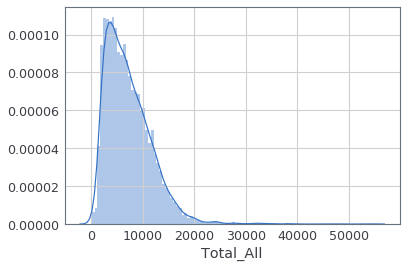

In [432]:
sns.distplot(patients_pop['Total_All'],bins=100)

In [437]:
practice_vals = {}
for index , row in patients_pop.iterrows():
    if row['PRACTICE_CODE'] in postcode_stripped:
        if row['PRACTICE_CODE'] not in practice_vals:
            practice_vals[row['PRACTICE_CODE']] = {}
        practice_vals[row['PRACTICE_CODE']]['patients'] = row['Total_All']
        practice_vals[row['PRACTICE_CODE']]['postcode'] = postcode_stripped[row['PRACTICE_CODE']]


In [438]:
%store practice_vals

Stored 'practice_vals' (dict)


In [439]:
achievement_df.head()

,PRACTICE_CODE,INDICATOR_CODE,MEASURE,VALUE
0,A81001,AF001,ACHIEVED_POINTS,5.0
1,A81001,AF001,REGISTER,106.0
2,A81001,AF006,ACHIEVED_POINTS,12.0
3,A81001,AF006,DENOMINATOR,43.0
4,A81001,AF006,EXCEPTIONS,1.0


In [440]:
prevalence_df = pd.read_csv('../BL_Work/grondTruths/PREVALENCE.csv')
prevalence_df = prevalence_df.dropna()
prevalence_df.head()

,PRACTICE_CODE,INDICATOR_GROUP_CODE,REGISTER,PATIENT_LIST_TYPE,PATIENT_LIST_SIZE
0,A81001,AF,106.0,TOTAL,4150
1,A81001,AST,306.0,TOTAL,4150
2,A81001,CAN,118.0,TOTAL,4150
3,A81001,CHD,171.0,TOTAL,4150
4,A81001,CKD,188.0,18OV,3314


In [441]:
practice_vals

{'E84702': {'patients': 2855, 'postcode': 'NW2'},
 'E84701': {'patients': 3873, 'postcode': 'HA0'},
 'E84706': {'patients': 2212, 'postcode': 'NW9'},
 'E84704': {'patients': 2285, 'postcode': 'NW2'},
 'E84705': {'patients': 2491, 'postcode': 'NW10'},
 'E84708': {'patients': 2178, 'postcode': 'NW10'},
 'E84709': {'patients': 10160, 'postcode': 'HA9'},
 'Y02795': {'patients': 2630, 'postcode': 'M24'},
 'B85014': {'patients': 9805, 'postcode': 'WF16'},
 'B85015': {'patients': 9006, 'postcode': 'WF17'},
 'B85016': {'patients': 9377, 'postcode': 'HD1'},
 'B85010': {'patients': 6603, 'postcode': 'HD5'},
 'B85011': {'patients': 6274, 'postcode': 'HD7'},
 'B85012': {'patients': 10602, 'postcode': 'WF16'},
 'B85018': {'patients': 8788, 'postcode': 'WF17'},
 'B85019': {'patients': 16935, 'postcode': 'WF14'},
 'N81032': {'patients': 22494, 'postcode': 'CW11'},
 'N81033': {'patients': 7711, 'postcode': 'SK9'},
 'N81030': {'patients': 12032, 'postcode': 'WA6'},
 'N81031': {'patients': 5588, 'postco

In [416]:
%store -r postCodeDict

In [418]:
# postCodeDict

In [446]:
%store -r compre_postCode_dict

In [447]:
compre_postCode_dict

{'Adur': {'areaId': ['E07000223'],
  'postcodes': ['BN41', 'BN15', 'BN14', 'BN42', 'BN43']},
 'Allerdale': {'areaId': ['E07000026'],
  'postcodes': ['CA13', 'CA15', 'CA14', 'CA7', 'CA12', 'CA5']},
 'Amber Valley': {'areaId': ['E07000032'],
  'postcodes': ['DE4',
   'DE22',
   'DE21',
   'DE5',
   'NG16',
   'DE6',
   'DE56',
   'DE55',
   'DE75',
   'DE7']},
 'Arun': {'areaId': ['E07000224'],
  'postcodes': ['BN18',
   'BN17',
   'BN16',
   'BN13',
   'BN12',
   'PO21',
   'PO18',
   'PO20',
   'PO22']},
 'Ashfield': {'areaId': ['E07000170'],
  'postcodes': ['NG17', 'NG6', 'NG15', 'NG18', 'NG19']},
 'Ashford': {'areaId': ['E07000105'],
  'postcodes': ['CT4',
   'TN30',
   'TN17',
   'TN18',
   'ME13',
   'ME17',
   'TN23',
   'TN24',
   'TN25',
   'TN26',
   'TN27']},
 'Aylesbury Vale': {'areaId': ['E07000004'],
  'postcodes': ['HP19',
   'HP18',
   'HP17',
   'HP16',
   'MK19',
   'MK18',
   'OX9',
   'OX5',
   'MK17',
   'HP4',
   'OX33',
   'OX27',
   'HP22',
   'HP23',
   'HP20',
 

In [553]:
Area_values = {}
for k in practice_vals:
    for area in district_vals:
        if area not in Area_values:
            Area_values[area] = {}
            Area_values[area]['patients'] = 0.0
            Area_values[area]['population'] = district_vals[area]['population']
        if practice_vals[k]['postcode'] in compre_postCode_dict[area]['postcodes']:
            Area_values[area]['patients']+=practice_vals[k]['patients']

In [554]:
# Area_values = {}
# for k in practice_vals:
#     for area in district_vals:
#         if area not in Area_values:
#             Area_values[area] = {}
#             Area_values[area]['patients'] = 0.0
#             Area_values[area]['population'] = district_vals[area]['population']
#         if practice_vals[k]['postcode'] in postCodeDict[area]['postcodes']:
#             Area_values[area]['patients']+=practice_vals[k]['patients']

In [555]:
Area_values

{u'Adur': {'patients': 133765.0, 'population': 61929},
 u'Allerdale': {'patients': 108473.0, 'population': 96268},
 u'Amber Valley': {'patients': 386927.0, 'population': 122746},
 u'Arun': {'patients': 213991.0, 'population': 150877},
 u'Ashfield': {'patients': 252315.0, 'population': 120131},
 u'Ashford': {'patients': 243080.0, 'population': 120116},
 u'Aylesbury Vale': {'patients': 481973.0, 'population': 176867},
 u'Babergh': {'patients': 168634.0, 'population': 87917},
 u'Barking and Dagenham': {'patients': 277996.0, 'population': 190560},
 u'Barnet': {'patients': 723280.0, 'population': 363956},
 u'Barnsley': {'patients': 427077.0, 'population': 233671},
 u'Barrow-in-Furness': {'patients': 92644.0, 'population': 68446},
 u'Basildon': {'patients': 291740.0, 'population': 176474},
 u'Basingstoke and Deane': {'patients': 333885.0, 'population': 170492},
 u'Bassetlaw': {'patients': 234610.0, 'population': 112248},
 u'Bath and North East Somerset': {'patients': 264739.0, 'population': 

In [556]:
len(Area_values)

326

In [557]:
%store Area_values

Stored 'Area_values' (dict)


In [558]:
common_areas = Area_values.keys()

In [559]:
prevalence = {}
for name , group in prevalence_df.groupby('INDICATOR_GROUP_CODE'):
    print name , len(group)
    if name not in prevalence:
        prevalence[name] = {}
    for index , row in group.iterrows():
        try:
            pc = postcode_stripped[row['PRACTICE_CODE'].strip()]
        except:
#             print "failed to find postcode for practice code %s"%row['PRACTICE_CODE']
#             df['postcode'].append('000 000')
            continue
        for area in common_areas:

            if area not in prevalence[name]:
#                 print Area_values[area]
                prevalence[name][area] = {}
                prevalence[name][area]['patients'] = 0.0
                prevalence[name][area]['list_size'] = 0.0
                prevalence[name][area]['total_patients'] = Area_values[area]['patients']
                prevalence[name][area]['population'] = Area_values[area]['population']
            if pc in compre_postCode_dict[area]['postcodes']:
                if np.isnan(row['REGISTER']):
                    print "NANANAN"
                prevalence[name][area]['patients']+=float(row['REGISTER'])
                prevalence[name][area]['list_size']+=float(row['PATIENT_LIST_SIZE'])
            if prevalence[name][area]['list_size'] > prevalence[name][area]['total_patients']:
                prevalence[name][area]['list_size'] = prevalence[name][area]['total_patients']


print prevalence

AF 7330
AST 7330
CAN 7330
CHD 7330
CKD 7330
COPD 7330
CVDPP 7329
DEM 7330
DEP 7329
DM 7330
EP 7330
HF 7330
HYP 7330
LD 7330
MH 7330
OB 7330
OST 7330
PAD 7330
PC 7330
RA 7330
STIA 7330
{'CKD': {u'Mendip': {'patients': 5806.0, 'population': 109755, 'list_size': 120250.0, 'total_patients': 148074.0}, u'Hastings': {'patients': 2507.0, 'population': 90345, 'list_size': 65197.0, 'total_patients': 98881.0}, u'Windsor and Maidenhead': {'patients': 811.0, 'population': 145822, 'list_size': 27109.0, 'total_patients': 34289.0}, u'Wyre Forest': {'patients': 0.0, 'population': 98074, 'list_size': 0.0, 'total_patients': 0.0}, u'Peterborough': {'patients': 4946.0, 'population': 185829, 'list_size': 176312.0, 'total_patients': 217702.0}, u'Epping Forest': {'patients': 6076.0, 'population': 126080, 'list_size': 194219.0, 'total_patients': 242087.0}, u'Hambleton': {'patients': 10575.0, 'population': 89549, 'list_size': 206981.0, 'total_patients': 253482.0}, u'Dudley': {'patients': 7346.0, 'population': 

In [560]:
#calculate Area level prevalence by aggregating all gps into one virtual GP
for k in prevalence:
    df = {'Area':[] , 'prevalence':[]}
    for area in prevalence[k]:
        df['Area'].append(area)
        print prevalence[name][area]
        prev = (float( prevalence[name][area]['patients']+1.0) / float(prevalence[name][area]['list_size']+1.0))
        scaling = float(prevalence[name][area]['total_patients'])/float(prevalence[name][area]['population'])
        print 'prevalence %f , scaling %f'%(prev,scaling)
#         df['prevalence'].append(prev*scaling)
        df['prevalence'].append(prev)
#         df['prevalence'].append(((float( prevalence[name][area]['patients']+1.0) / float(prevalence[name][area]['list_size']+1.0))))
    disease_df = pd.DataFrame(data=df)
    filePath = '../BL_Work/prevalence_LA_method2/' + k +'.csv'
    disease_df.to_csv(filePath)

{'patients': 3230.0, 'population': 109755, 'list_size': 148074.0, 'total_patients': 148074.0}
prevalence 0.021820 , scaling 1.349132
{'patients': 1703.0, 'population': 90345, 'list_size': 81411.0, 'total_patients': 98881.0}
prevalence 0.020931 , scaling 1.094482
{'patients': 691.0, 'population': 145822, 'list_size': 34185.0, 'total_patients': 34289.0}
prevalence 0.020242 , scaling 0.235143
{'patients': 0.0, 'population': 98074, 'list_size': 0.0, 'total_patients': 0.0}
prevalence 1.000000 , scaling 0.000000
{'patients': 3231.0, 'population': 185829, 'list_size': 217702.0, 'total_patients': 217702.0}
prevalence 0.014846 , scaling 1.171518
{'patients': 3610.0, 'population': 126080, 'list_size': 242087.0, 'total_patients': 242087.0}
prevalence 0.014916 , scaling 1.920106
{'patients': 6500.0, 'population': 89549, 'list_size': 253110.0, 'total_patients': 253482.0}
prevalence 0.025684 , scaling 2.830651
{'patients': 3351.0, 'population': 313589, 'list_size': 177201.0, 'total_patients': 367834

{'patients': 3230.0, 'population': 109755, 'list_size': 148074.0, 'total_patients': 148074.0}
prevalence 0.021820 , scaling 1.349132
{'patients': 1703.0, 'population': 90345, 'list_size': 81411.0, 'total_patients': 98881.0}
prevalence 0.020931 , scaling 1.094482
{'patients': 691.0, 'population': 145822, 'list_size': 34185.0, 'total_patients': 34289.0}
prevalence 0.020242 , scaling 0.235143
{'patients': 0.0, 'population': 98074, 'list_size': 0.0, 'total_patients': 0.0}
prevalence 1.000000 , scaling 0.000000
{'patients': 3231.0, 'population': 185829, 'list_size': 217702.0, 'total_patients': 217702.0}
prevalence 0.014846 , scaling 1.171518
{'patients': 3610.0, 'population': 126080, 'list_size': 242087.0, 'total_patients': 242087.0}
prevalence 0.014916 , scaling 1.920106
{'patients': 6500.0, 'population': 89549, 'list_size': 253110.0, 'total_patients': 253482.0}
prevalence 0.025684 , scaling 2.830651
{'patients': 3351.0, 'population': 313589, 'list_size': 177201.0, 'total_patients': 367834

prevalence 1.000000 , scaling 0.000000
{'patients': 9239.0, 'population': 233671, 'list_size': 426970.0, 'total_patients': 427077.0}
prevalence 0.021641 , scaling 1.827685
{'patients': 5924.0, 'population': 145936, 'list_size': 302968.0, 'total_patients': 302968.0}
prevalence 0.019556 , scaling 2.076033
{'patients': 3924.0, 'population': 200153, 'list_size': 176426.0, 'total_patients': 176426.0}
prevalence 0.022247 , scaling 0.881456
{'patients': 2652.0, 'population': 92238, 'list_size': 130106.0, 'total_patients': 130106.0}
prevalence 0.020391 , scaling 1.410547
{'patients': 3146.0, 'population': 284617, 'list_size': 300163.0, 'total_patients': 300163.0}
prevalence 0.010484 , scaling 1.054621
{'patients': 2428.0, 'population': 87365, 'list_size': 108799.0, 'total_patients': 108799.0}
prevalence 0.022325 , scaling 1.245339
{'patients': 2107.0, 'population': 242377, 'list_size': 133609.0, 'total_patients': 133609.0}
prevalence 0.015777 , scaling 0.551245
{'patients': 2609.0, 'population

{'patients': 2437.0, 'population': 108302, 'list_size': 162948.0, 'total_patients': 162948.0}
prevalence 0.014962 , scaling 1.504571
{'patients': 3378.0, 'population': 153101, 'list_size': 166955.0, 'total_patients': 166955.0}
prevalence 0.020239 , scaling 1.090489
{'patients': 3490.0, 'population': 78335, 'list_size': 137509.0, 'total_patients': 137509.0}
prevalence 0.025387 , scaling 1.755397
{'patients': 1581.0, 'population': 94018, 'list_size': 85966.0, 'total_patients': 85966.0}
prevalence 0.018402 , scaling 0.914357
{'patients': 0.0, 'population': 36170, 'list_size': 0.0, 'total_patients': 0.0}
prevalence 1.000000 , scaling 0.000000
{'patients': 2591.0, 'population': 283897, 'list_size': 137570.0, 'total_patients': 137570.0}
prevalence 0.018841 , scaling 0.484577
{'patients': 5027.0, 'population': 112248, 'list_size': 224327.0, 'total_patients': 234610.0}
prevalence 0.022414 , scaling 2.090104
{'patients': 7350.0, 'population': 278984, 'list_size': 389561.0, 'total_patients': 389

prevalence 0.022584 , scaling 0.763229
{'patients': 1353.0, 'population': 68366, 'list_size': 63140.0, 'total_patients': 63140.0}
prevalence 0.021444 , scaling 0.923558
{'patients': 1502.0, 'population': 199902, 'list_size': 102222.0, 'total_patients': 102994.0}
prevalence 0.014703 , scaling 0.515222
{'patients': 7402.0, 'population': 330200, 'list_size': 366761.0, 'total_patients': 366761.0}
prevalence 0.020185 , scaling 1.110724
{'patients': 7441.0, 'population': 134359, 'list_size': 322937.0, 'total_patients': 322937.0}
prevalence 0.023045 , scaling 2.403538
{'patients': 4159.0, 'population': 186199, 'list_size': 236606.0, 'total_patients': 236606.0}
prevalence 0.017582 , scaling 1.270716
{'patients': 1473.0, 'population': 94841, 'list_size': 78804.0, 'total_patients': 78804.0}
prevalence 0.018704 , scaling 0.830906
{'patients': 4155.0, 'population': 142110, 'list_size': 253821.0, 'total_patients': 253821.0}
prevalence 0.016374 , scaling 1.786088
{'patients': 5927.0, 'population': 1

prevalence 0.014371 , scaling 0.746897
{'patients': 569.0, 'population': 86138, 'list_size': 39115.0, 'total_patients': 39115.0}
prevalence 0.014572 , scaling 0.454097
{'patients': 754.0, 'population': 99377, 'list_size': 56779.0, 'total_patients': 56779.0}
prevalence 0.013297 , scaling 0.571350
{'patients': 488.0, 'population': 91732, 'list_size': 33908.0, 'total_patients': 33908.0}
prevalence 0.014421 , scaling 0.369642
{'patients': 3697.0, 'population': 64407, 'list_size': 157566.0, 'total_patients': 157566.0}
prevalence 0.023469 , scaling 2.446411
{'patients': 710.0, 'population': 107118, 'list_size': 37222.0, 'total_patients': 37222.0}
prevalence 0.019101 , scaling 0.347486
{'patients': 1236.0, 'population': 214566, 'list_size': 89959.0, 'total_patients': 89959.0}
prevalence 0.013751 , scaling 0.419260
{'patients': 2269.0, 'population': 80190, 'list_size': 108321.0, 'total_patients': 108321.0}
prevalence 0.020956 , scaling 1.350804
{'patients': 5176.0, 'population': 148428, 'list_

prevalence 0.023469 , scaling 2.446411
{'patients': 710.0, 'population': 107118, 'list_size': 37222.0, 'total_patients': 37222.0}
prevalence 0.019101 , scaling 0.347486
{'patients': 1236.0, 'population': 214566, 'list_size': 89959.0, 'total_patients': 89959.0}
prevalence 0.013751 , scaling 0.419260
{'patients': 2269.0, 'population': 80190, 'list_size': 108321.0, 'total_patients': 108321.0}
prevalence 0.020956 , scaling 1.350804
{'patients': 5176.0, 'population': 148428, 'list_size': 225897.0, 'total_patients': 225897.0}
prevalence 0.022917 , scaling 1.521930
{'patients': 3486.0, 'population': 138744, 'list_size': 184833.0, 'total_patients': 184833.0}
prevalence 0.018866 , scaling 1.332187
{'patients': 0.0, 'population': 90047, 'list_size': 0.0, 'total_patients': 0.0}
prevalence 1.000000 , scaling 0.000000
{'patients': 2317.0, 'population': 91118, 'list_size': 102752.0, 'total_patients': 102752.0}
prevalence 0.022559 , scaling 1.127681
{'patients': 1595.0, 'population': 189145, 'list_si

prevalence 0.018164 , scaling 1.223177
{'patients': 810.0, 'population': 141162, 'list_size': 33152.0, 'total_patients': 33159.0}
prevalence 0.024462 , scaling 0.234900
{'patients': 3215.0, 'population': 94225, 'list_size': 168663.0, 'total_patients': 172706.0}
prevalence 0.019067 , scaling 1.832911
{'patients': 0.0, 'population': 108971, 'list_size': 0.0, 'total_patients': 0.0}
prevalence 1.000000 , scaling 0.000000
{'patients': 2877.0, 'population': 74980, 'list_size': 128911.0, 'total_patients': 128911.0}
prevalence 0.022325 , scaling 1.719272
{'patients': 2635.0, 'population': 97611, 'list_size': 119812.0, 'total_patients': 119812.0}
prevalence 0.022001 , scaling 1.227444
{'patients': 272.0, 'population': 64022, 'list_size': 12439.0, 'total_patients': 12465.0}
prevalence 0.021945 , scaling 0.194699
{'patients': 1637.0, 'population': 101316, 'list_size': 54585.0, 'total_patients': 55207.0}
prevalence 0.030008 , scaling 0.544899
{'patients': 1967.0, 'population': 123293, 'list_size':

{'patients': 1268.0, 'population': 112809, 'list_size': 61556.0, 'total_patients': 61556.0}
prevalence 0.020615 , scaling 0.545666
{'patients': 0.0, 'population': 125805, 'list_size': 0.0, 'total_patients': 0.0}
prevalence 1.000000 , scaling 0.000000
{'patients': 3397.0, 'population': 82731, 'list_size': 149712.0, 'total_patients': 149712.0}
prevalence 0.022697 , scaling 1.809624
{'patients': 1459.0, 'population': 318480, 'list_size': 77760.0, 'total_patients': 77760.0}
prevalence 0.018775 , scaling 0.244160
{'patients': 3664.0, 'population': 137243, 'list_size': 141857.0, 'total_patients': 141857.0}
prevalence 0.025836 , scaling 1.033619
{'patients': 2837.0, 'population': 116071, 'list_size': 121825.0, 'total_patients': 121825.0}
prevalence 0.023296 , scaling 1.049573
{'patients': 3626.0, 'population': 93847, 'list_size': 125864.0, 'total_patients': 128962.0}
prevalence 0.028817 , scaling 1.374173
{'patients': 2655.0, 'population': 63073, 'list_size': 133707.0, 'total_patients': 13370

{'patients': 2423.0, 'population': 202225, 'list_size': 277035.0, 'total_patients': 277035.0}
prevalence 0.008750 , scaling 1.369934
{'patients': 16656.0, 'population': 512616, 'list_size': 720438.0, 'total_patients': 720438.0}
prevalence 0.023121 , scaling 1.405415
{'patients': 6092.0, 'population': 323132, 'list_size': 402180.0, 'total_patients': 402180.0}
prevalence 0.015150 , scaling 1.244631
{'patients': 6660.0, 'population': 282442, 'list_size': 343041.0, 'total_patients': 343041.0}
prevalence 0.019417 , scaling 1.214554
{'patients': 13802.0, 'population': 756212, 'list_size': 799471.0, 'total_patients': 799471.0}
prevalence 0.017265 , scaling 1.057205
{'patients': 3413.0, 'population': 75404, 'list_size': 138498.0, 'total_patients': 138498.0}
prevalence 0.024650 , scaling 1.836746
{'patients': 8736.0, 'population': 510151, 'list_size': 638485.0, 'total_patients': 638485.0}
prevalence 0.013684 , scaling 1.251561
{'patients': 2234.0, 'population': 176008, 'list_size': 147990.0, 't

In [561]:
# disease_df

In [563]:
#Calculate GP level prevalence
for name , group in prevalence_df.groupby('INDICATOR_GROUP_CODE'):
    print name , len(group)
    df = {'practice_code':[] , 'postcode':[] , 'disease_prevalence':[] , 'survey_takers' : []}
    for index , row in group.iterrows():
        try:
            pc = postcodes[row['PRACTICE_CODE'].strip()]
        except:
            print "failed to find postcode for practice code %s"%row['PRACTICE_CODE']
#             df['postcode'].append('000 000')
            continue
        df['postcode'].append(pc)
        df['practice_code'].append(row['PRACTICE_CODE'].strip())
        prevalence = float(row['REGISTER'])/float(row['PATIENT_LIST_SIZE']+1)
        df['disease_prevalence'].append(prevalence)
        df['survey_takers'].append(row['PATIENT_LIST_SIZE']+1)
    disease_df = pd.DataFrame(data=df)
    filePath = '../BL_Work/prevalence/' + name +'.csv'
    disease_df.to_csv(filePath)

AF 7330
failed to find postcode for practice code A81001
failed to find postcode for practice code F84632
failed to find postcode for practice code Y03124
failed to find postcode for practice code Y03296
failed to find postcode for practice code Y03362
failed to find postcode for practice code Y03364
failed to find postcode for practice code Y03366
failed to find postcode for practice code Y03402
failed to find postcode for practice code Y03441
failed to find postcode for practice code Y03506
failed to find postcode for practice code Y03587
failed to find postcode for practice code Y03595
failed to find postcode for practice code Y03597
failed to find postcode for practice code Y03602
failed to find postcode for practice code Y03656
failed to find postcode for practice code Y03661
failed to find postcode for practice code Y03663
failed to find postcode for practice code Y03664
failed to find postcode for practice code Y03671
failed to find postcode for practice code Y03755
failed to fi

failed to find postcode for practice code F84632
failed to find postcode for practice code Y03124
failed to find postcode for practice code Y03296
failed to find postcode for practice code Y03362
failed to find postcode for practice code Y03364
failed to find postcode for practice code Y03366
failed to find postcode for practice code Y03402
failed to find postcode for practice code Y03441
failed to find postcode for practice code Y03506
failed to find postcode for practice code Y03587
failed to find postcode for practice code Y03595
failed to find postcode for practice code Y03597
failed to find postcode for practice code Y03602
failed to find postcode for practice code Y03656
failed to find postcode for practice code Y03661
failed to find postcode for practice code Y03663
failed to find postcode for practice code Y03664
failed to find postcode for practice code Y03671
failed to find postcode for practice code Y03755
failed to find postcode for practice code Y04266
failed to find postc

failed to find postcode for practice code F84632
failed to find postcode for practice code Y03124
failed to find postcode for practice code Y03296
failed to find postcode for practice code Y03362
failed to find postcode for practice code Y03364
failed to find postcode for practice code Y03366
failed to find postcode for practice code Y03402
failed to find postcode for practice code Y03441
failed to find postcode for practice code Y03506
failed to find postcode for practice code Y03587
failed to find postcode for practice code Y03595
failed to find postcode for practice code Y03597
failed to find postcode for practice code Y03602
failed to find postcode for practice code Y03656
failed to find postcode for practice code Y03661
failed to find postcode for practice code Y03663
failed to find postcode for practice code Y03664
failed to find postcode for practice code Y03671
failed to find postcode for practice code Y03755
failed to find postcode for practice code Y04266
failed to find postc

failed to find postcode for practice code F84632
failed to find postcode for practice code Y03124
failed to find postcode for practice code Y03296
failed to find postcode for practice code Y03362
failed to find postcode for practice code Y03364
failed to find postcode for practice code Y03366
failed to find postcode for practice code Y03402
failed to find postcode for practice code Y03441
failed to find postcode for practice code Y03506
failed to find postcode for practice code Y03587
failed to find postcode for practice code Y03595
failed to find postcode for practice code Y03597
failed to find postcode for practice code Y03602
failed to find postcode for practice code Y03656
failed to find postcode for practice code Y03661
failed to find postcode for practice code Y03663
failed to find postcode for practice code Y03664
failed to find postcode for practice code Y03671
failed to find postcode for practice code Y03755
failed to find postcode for practice code Y04266
failed to find postc

failed to find postcode for practice code F84632
failed to find postcode for practice code Y03124
failed to find postcode for practice code Y03296
failed to find postcode for practice code Y03362
failed to find postcode for practice code Y03364
failed to find postcode for practice code Y03366
failed to find postcode for practice code Y03402
failed to find postcode for practice code Y03441
failed to find postcode for practice code Y03506
failed to find postcode for practice code Y03587
failed to find postcode for practice code Y03595
failed to find postcode for practice code Y03597
failed to find postcode for practice code Y03602
failed to find postcode for practice code Y03656
failed to find postcode for practice code Y03661
failed to find postcode for practice code Y03663
failed to find postcode for practice code Y03664
failed to find postcode for practice code Y03671
failed to find postcode for practice code Y03755
failed to find postcode for practice code Y04266
failed to find postc

failed to find postcode for practice code F84632
failed to find postcode for practice code Y03124
failed to find postcode for practice code Y03296
failed to find postcode for practice code Y03362
failed to find postcode for practice code Y03364
failed to find postcode for practice code Y03366
failed to find postcode for practice code Y03402
failed to find postcode for practice code Y03441
failed to find postcode for practice code Y03506
failed to find postcode for practice code Y03587
failed to find postcode for practice code Y03595
failed to find postcode for practice code Y03597
failed to find postcode for practice code Y03602
failed to find postcode for practice code Y03656
failed to find postcode for practice code Y03661
failed to find postcode for practice code Y03663
failed to find postcode for practice code Y03664
failed to find postcode for practice code Y03671
failed to find postcode for practice code Y03755
failed to find postcode for practice code Y04266
failed to find postc

failed to find postcode for practice code F84632
failed to find postcode for practice code Y03124
failed to find postcode for practice code Y03296
failed to find postcode for practice code Y03362
failed to find postcode for practice code Y03364
failed to find postcode for practice code Y03366
failed to find postcode for practice code Y03402
failed to find postcode for practice code Y03441
failed to find postcode for practice code Y03506
failed to find postcode for practice code Y03587
failed to find postcode for practice code Y03595
failed to find postcode for practice code Y03597
failed to find postcode for practice code Y03602
failed to find postcode for practice code Y03656
failed to find postcode for practice code Y03661
failed to find postcode for practice code Y03663
failed to find postcode for practice code Y03664
failed to find postcode for practice code Y03671
failed to find postcode for practice code Y03755
failed to find postcode for practice code Y04266
failed to find postc

In [533]:
Diabetic_melitis = pd.read_csv('../BL_Work/prevalence/DM.csv')
Diabetic_melitis.head(n =10)


,Unnamed: 0,disease_prevalence,postcode,practice_code,registered
0,0,0.073022,TS18 2AW,A81002,16365
1,1,0.061661,TS1 3BE,A81004,7898
2,2,0.065260,TS14 7DJ,A81005,6589
3,3,0.078078,TS18 2AT,A81006,10989
4,4,0.071024,TS24 7PW,A81007,7941
5,5,0.070163,TS5 6HF,A81009,7169
6,6,0.068770,TS24 7PW,A81011,9539
7,7,0.067919,TS3 6AL,A81012,3725
8,8,0.081477,TS12 2FF,A81013,4983
9,9,0.075176,TS23 2LA,A81014,3259


In [534]:
Diabetic_melitis_ = Diabetic_melitis[Diabetic_melitis['disease_prevalence']>0.0]

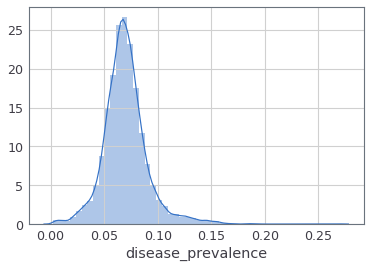

In [535]:
sns.distplot(Diabetic_melitis_['disease_prevalence'])

In [536]:
practice_level_files = glob('../BL_Work/prevalence/*.csv')
print practice_level_files

['../BL_Work/prevalence/EP.csv', '../BL_Work/prevalence/MH.csv', '../BL_Work/prevalence/OB.csv', '../BL_Work/prevalence/DM.csv', '../BL_Work/prevalence/CAN.csv', '../BL_Work/prevalence/PAD.csv', '../BL_Work/prevalence/STIA.csv', '../BL_Work/prevalence/CHD.csv', '../BL_Work/prevalence/RA.csv', '../BL_Work/prevalence/AF.csv', '../BL_Work/prevalence/COPD.csv', '../BL_Work/prevalence/OST.csv', '../BL_Work/prevalence/CVDPP.csv', '../BL_Work/prevalence/HF.csv', '../BL_Work/prevalence/AST.csv', '../BL_Work/prevalence/HYP.csv', '../BL_Work/prevalence/CKD.csv', '../BL_Work/prevalence/DEM.csv', '../BL_Work/prevalence/LD.csv', '../BL_Work/prevalence/PC.csv', '../BL_Work/prevalence/DEP.csv']


In [537]:
%store -r compre_postCode_dict

In [546]:
postCodeDict = compre_postCode_dict

In [550]:
def countPrevalence(boroughDict,allPriscriptions):
    allPriscriptions = allPriscriptions.dropna()
    allPrescriptionCount = {}
    for k in boroughDict:
        allPrescriptionCount[k] = {'weighted_mean':0.0}
        areas = boroughDict[k]['postcodes']
        all_disease = allPriscriptions[allPriscriptions['postcode'].isin(areas)]
        all_disease = all_disease.dropna()
        all_patients = np.sum(all_disease['registered'])
        area_prev = []
        for index,row in all_disease.iterrows():
            area_prev.append(float(row['disease_prevalence'])*float(row['registered']))
        prev_weighted =  float(np.sum(area_prev))/float(all_patients+1.0)
#         prev_weighted =  float(np.mean(area_prev))
        if np.isnan(prev_weighted):
            print "%f , %f "%(np.sum(area_prev) , all_patients) 
            prev_weighted = 0.0
        allPrescriptionCount[k]['weighted_mean'] = prev_weighted
    return allPrescriptionCount
        

In [551]:
DiseaseMapping = {}

In [552]:
DiseasePrevalence = {}
for f in tqdm(practice_level_files):
    disease = f.split('/')[-1].split('.')[0]
    pdp = pd.read_csv(f)
    pdp['postcode']= pdp['postcode'].str.split(' ', n = 1, expand = True)
    all_prescriptions = countPrevalence(postCodeDict,pdp)
    DiseasePrevalence[disease] = all_prescriptions

  0%|          | 0/21 [00:00<?, ?it/s]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


  5%|▍         | 1/21 [00:01<00:26,  1.32s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 10%|▉         | 2/21 [00:02<00:24,  1.29s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 14%|█▍        | 3/21 [00:03<00:22,  1.28s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 19%|█▉        | 4/21 [00:05<00:21,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 24%|██▍       | 5/21 [00:06<00:20,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 29%|██▊       | 6/21 [00:07<00:19,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 33%|███▎      | 7/21 [00:08<00:17,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 38%|███▊      | 8/21 [00:10<00:16,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 43%|████▎     | 9/21 [00:11<00:15,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 48%|████▊     | 10/21 [00:12<00:14,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 52%|█████▏    | 11/21 [00:14<00:12,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 57%|█████▋    | 12/21 [00:15<00:11,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 62%|██████▏   | 13/21 [00:16<00:10,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 67%|██████▋   | 14/21 [00:17<00:08,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 71%|███████▏  | 15/21 [00:19<00:07,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 76%|███████▌  | 16/21 [00:20<00:06,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 81%|████████  | 17/21 [00:21<00:05,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 86%|████████▌ | 18/21 [00:22<00:03,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 90%|█████████ | 19/21 [00:24<00:02,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


 95%|█████████▌| 20/21 [00:25<00:01,  1.27s/it]

0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 
0.000000 , nan 


100%|██████████| 21/21 [00:26<00:00,  1.27s/it]

0.000000 , nan 
0.000000 , nan 


In [542]:
DiseasePrevalence

{'AF': {'Adur': {'weighted_mean': 0.023494286008442295},
  'Allerdale': {'weighted_mean': 0.024156093986167727},
  'Amber Valley': {'weighted_mean': 0.022711933735555783},
  'Arun': {'weighted_mean': 0.02912022764998814},
  'Ashfield': {'weighted_mean': 0.018572778452718423},
  'Ashford': {'weighted_mean': 0.02459887898763837},
  'Aylesbury Vale': {'weighted_mean': 0.019594496915959908},
  'Babergh': {'weighted_mean': 0.025082801282762728},
  'Barking and Dagenham': {'weighted_mean': 0.008798301779334864},
  'Barnet': {'weighted_mean': 0.012939330194664263},
  'Barnsley': {'weighted_mean': 0.02171296361345679},
  'Barrow-in-Furness': {'weighted_mean': 0.022161863847377478},
  'Basildon': {'weighted_mean': 0.017774945117201332},
  'Basingstoke and Deane': {'weighted_mean': 0.018269340772486865},
  'Bassetlaw': {'weighted_mean': 0.023998003137926115},
  'Bath and North East Somerset': {'weighted_mean': 0.022031759582729557},
  'Bedford': {'weighted_mean': 0.019063426326087995},
  'Bexley

In [543]:
#Calculate aggregated Prevalence at Area level using GP level weighted prevalences
for disease in DiseasePrevalence:
    mapping_disease = {'Area':[],'weighted_mean':[]}
    for k in DiseasePrevalence[disease]:
        mapping_disease['Area'].append(k)
        mapping_disease['weighted_mean'].append(DiseasePrevalence[disease][k]['weighted_mean'])
    disease_df = pd.DataFrame(data=mapping_disease) 
    filePath = '../BL_Work/prevalence_LA_level/' + disease +'_GP_to_LA_level.csv'
    disease_df.to_csv(filePath)

In [310]:
# json.dump(DiseasePrevalence, open('../BL_Work/prevalence/processed_GT_all_LA.json','wb'))

In [311]:
indicator_map_df = pd.read_csv('../BL_Work/grondTruths/INDICATOR_MAPPINGS.csv')

In [312]:
indicator_map_df.head()

,INDICATOR_CODE,INDICATOR_DESCRIPTION,INDICATOR_POINT_VALUE,INDICATOR_GROUP_CODE,INDICATOR_GROUP_DESCRIPTION,DOMAIN_CODE,DOMAIN_DESCRIPTION,PATIENT_LIST_TYPE
0,AF001,The contractor establishes and maintains a reg...,5,AF,Atrial fibrillation,CL,Clinical,TOTAL
1,AF006,The percentage of patients with atrial fibrill...,12,AF,Atrial fibrillation,CL,Clinical,TOTAL
2,AF007,In those patients with atrial fibrillation wit...,12,AF,Atrial fibrillation,CL,Clinical,TOTAL
3,AST001,The contractor establishes and maintains a reg...,4,AST,Asthma,CL,Clinical,TOTAL
4,AST002,The percentage of patients aged 8 or over with...,15,AST,Asthma,CL,Clinical,TOTAL


In [313]:
% ls ../BL_Work/grondTruths/

ACHIEVEMENT.csv
CCG_EXCEPTIONS_EXCLUSIONS.csv
GPPS 2017 List of reporting variables (csv) PUBLIC.csv
GPPS 2017 Practice data (weighted) (csv) PUBLIC.csv
GPPS.csv
gp-reg-patients-04-2013.csv
INDICATOR_MAPPINGS.csv
ORGANISATION_REFERENCE.csv
PREVALENCE.csv
readme.txt


In [331]:
DEP = pd.read_csv('../BL_Work/prevalence_LA_level/DM_LA_level.csv')

In [332]:
DEP.head(n=300)

,Unnamed: 0,Area,weighted_mean
0,0,Mendip,0.057504
1,1,Windsor and Maidenhead,0.052812
2,2,Hambleton,0.062323
3,3,Ipswich,0.060194
4,4,Castle Point,0.068115
5,5,Rochdale,0.080714
6,6,Liverpool,0.068198
7,7,Kirklees,0.070630
8,8,Epsom and Ewell,0.059737
9,9,Sefton,0.070013


In [333]:
prev = DEP['weighted_mean'].rank()

In [334]:
prev[0]

53.0

In [335]:
disease_prevalence_prescriptions = json.load(open('DiseasePrevalenceUK_threeMethods.json','rb'))

In [336]:
disease_conf = json.load(open('DiseaseConfidence_V2.json','rb'))

In [337]:
disease_conf

{u'"Meniere\'s disease"': {u'Aberdeenshire': [-1.0, -1.0, -1.0, -1.0, -1.0],
  u'Adur': [3.347884957617933,
   3.338938959689651,
   3.4035734539115827,
   3.4252327833088145,
   3.3564103018755596],
  u'Allerdale': [3.9353022254614185,
   3.9071931778183995,
   3.9821354218065776,
   3.963019733729114,
   3.981249923298974],
  u'Amber Valley': [4.381689681686037,
   4.395457102882475,
   4.444222331057227,
   4.424554285526029,
   4.437737555750777],
  u'Angus': [-1.0, -1.0, -1.0, -1.0, -1.0],
  u'Argyll and Bute': [-1.0, -1.0, -1.0, -1.0, -1.0],
  u'Arun': [3.7201806341503705,
   3.711830254534802,
   3.760149929990476,
   3.7407232345916688,
   3.777029771366653],
  u'Ashfield': [4.0108373009070615,
   4.013826651156348,
   4.026487769871147,
   4.006570672490116,
   4.039075138998106],
  u'Ashford': [4.538603063551599,
   4.496341937906359,
   4.5616122847645135,
   4.570498490296847,
   4.592863171852576],
  u'Aylesbury Vale': [4.232918547682689,
   4.25305287126989,
   4.29070455

In [338]:
 disease_prevalence_prescriptions['prescriptions'].keys()

[u'psoriasis',
 u'gastroparesis',
 u'"multiple+sclerosis"',
 u'"crohn\'s+disease"',
 u'"interstitial+cystitis"',
 u'rheumatoid',
 u'parkinsons',
 u'dysautonomia',
 u'"kidney+stones"',
 u'"chronic+fatigue+syndrome"',
 u'bipolar',
 u'hypothyroidism',
 u'"sleep+apnea"',
 u'"Meniere\'s disease"',
 u'dementia',
 u'"irritable+bowel+syndrome"',
 u'depression',
 u'diabetes']

In [339]:
Dprev = disease_prevalence_prescriptions['prescriptions']['diabetes']

In [340]:
Dprev.keys()

[u'Mendip',
 u'Rhondda Cynon Taf',
 u'Wychavon',
 u'Wyre Forest',
 u'Peterborough',
 u'Epping Forest',
 u'Blaenau Gwent',
 u'Hambleton',
 u'Flintshire',
 u'Dudley',
 u'Barnet',
 u'Warrington',
 u'Tonbridge and Malling',
 u'Tower Hamlets',
 u'Cotswold',
 u'South Staffordshire',
 u'Ribble Valley',
 u'Warwick',
 u'Enfield',
 u'Belfast',
 u'Castle Point',
 u'Rochdale',
 u'Stockport',
 u'Powys',
 u'Greenwich',
 u'Liverpool',
 u'Brighton and Hove',
 u'Kirklees',
 u'Bromsgrove',
 u'Carmarthenshire',
 u'Allerdale',
 u'Neath Port Talbot',
 u'Mole Valley',
 u'Waverley',
 u'Sefton',
 u'Rossendale',
 u'York',
 u'Wrexham',
 u'Cheshire West and Chester',
 u'Exeter',
 u'Bury',
 u'Kettering',
 u'Cherwell',
 u'East Ayrshire',
 u'Torfaen',
 u'Luton',
 u'Spelthorne',
 u'Angus',
 u'Milton Keynes',
 u'Charnwood',
 u'Wakefield',
 u'Solihull',
 u'Waltham Forest',
 u'South Lakeland',
 u'South Kesteven',
 u'Shropshire',
 u'Newport',
 u'Bexley',
 u'North Warwickshire',
 u'Wirral',
 u'Chesterfield',
 u'Babergh',

In [341]:
predict = []
gt = []
for index, row in DEP.iterrows():
    if row['Area'].strip() in Dprev:
        if row['weighted_mean'] >= 0 and np.mean(disease_conf['depression'][row['Area'].strip()]) > 3.8:
            gt.append(np.mean(Dprev[row['Area'].strip()]))
            predict.append(row['weighted_mean'])

In [342]:
len(predict)

91

In [343]:
from scipy.stats import pearsonr
pearsonr(predict,gt)

(0.028188399184918857, 0.7908279342873054)

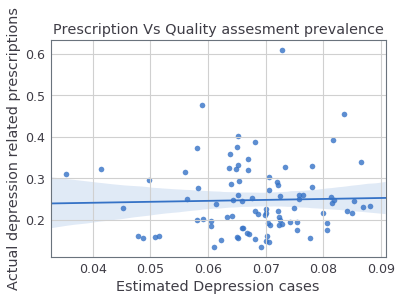

In [344]:
sns.regplot(x=predict , y = gt)
ax = plt.gca()
ax.set_title("Prescription Vs Quality assesment prevalence")
ax.set_xlabel("Estimated Depression cases")
ax.set_ylabel("Actual depression related prescriptions")